In [1]:
from keys import secret, key, url

In [2]:
import alpaca_trade_api as api
import alpaca_trade_api.rest as rapi

In [3]:
import pandas as pd

In [4]:
rest = api.REST(key, secret, url)

In [5]:
bars = rest.get_bars("spy", rapi.TimeFrame.Minute, "2021-01-01", "2021-12-31")

bars_ = [bar._raw for bar in bars]

x = pd.DataFrame(bars_)

In [6]:
x

,t,o,h,l,c,v,n,vw
0,2021-01-04T09:00:00Z,375.64,375.69,375.64,375.69,2606,21,375.678688
1,2021-01-04T09:01:00Z,375.69,375.81,375.69,375.79,16041,44,375.791473
2,2021-01-04T09:02:00Z,375.84,375.88,375.79,375.82,12514,27,375.834458
3,2021-01-04T09:04:00Z,375.90,376.04,375.90,375.91,8995,46,376.004726
4,2021-01-04T09:05:00Z,375.90,375.90,375.88,375.88,4550,10,375.893297
...,...,...,...,...,...,...,...,...
205318,2022-01-01T00:53:00Z,475.23,475.23,475.20,475.23,2750,9,475.228727
205319,2022-01-01T00:54:00Z,475.23,475.23,475.22,475.23,500,3,475.228000
205320,2022-01-01T00:55:00Z,475.23,475.23,475.23,475.23,544,4,475.230000
205321,2022-01-01T00:58:00Z,475.13,475.13,475.09,475.09,8832,12,475.094774


In [7]:
x.to_csv("spy-2021.csv")

In [117]:
prev = 10
columns = x.drop("t", axis=1).columns
groups = [x, ] + [x.drop("t", axis=1).shift(1).rename(lambda x: x+f"_{n}", axis=1) for n in range(1, prev+1) ]
xx = pd.concat(groups, axis=1)

for n in range(1, prev):
    for col in columns:
        xx[f"{col}_{n}_delta"] = (xx[f"{col}_{n}"] / xx[f"{col}_{n+1}"])-1

for col in columns:
    xx[f"{col}_0_delta"] = (xx[col] / xx[f"{col}_{1}"])-1
xx.dropna(inplace=True)

### Instructions
Each row contains o/h/l/c/v/n along with the previous N values. 

Hence, when training a model, drop all of the "current" values since those are the target values.

In [19]:
xx

,t,o,h,l,c,v,n,vw,o_1,h_1,...,v_4_delta,n_4_delta,vw_4_delta,o_0_delta,h_0_delta,l_0_delta,c_0_delta,v_0_delta,n_0_delta,vw_0_delta
0,2021-01-04T09:00:00Z,375.64,375.69,375.64,375.69,2606,21,375.678688,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2021-01-04T09:01:00Z,375.69,375.81,375.69,375.79,16041,44,375.791473,375.64,375.69,...,0.0,0.0,0.0,0.000133,0.000319,0.000133,0.000266,5.155411,1.095238,0.000300
2,2021-01-04T09:02:00Z,375.84,375.88,375.79,375.82,12514,27,375.834458,375.69,375.81,...,0.0,0.0,0.0,0.000399,0.000186,0.000266,0.000080,-0.219874,-0.386364,0.000114
3,2021-01-04T09:04:00Z,375.90,376.04,375.90,375.91,8995,46,376.004726,375.84,375.88,...,0.0,0.0,0.0,0.000160,0.000426,0.000293,0.000239,-0.281205,0.703704,0.000453
4,2021-01-04T09:05:00Z,375.90,375.90,375.88,375.88,4550,10,375.893297,375.90,376.04,...,0.0,0.0,0.0,0.000000,-0.000372,-0.000053,-0.000080,-0.494163,-0.782609,-0.000296
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
205318,2022-01-01T00:53:00Z,475.23,475.23,475.20,475.23,2750,9,475.228727,475.23,475.23,...,0.0,0.0,0.0,0.000000,0.000000,0.000021,0.000000,1.667313,0.285714,0.000009
205319,2022-01-01T00:54:00Z,475.23,475.23,475.22,475.23,500,3,475.228000,475.23,475.23,...,0.0,0.0,0.0,0.000000,0.000000,0.000042,0.000000,-0.818182,-0.666667,-0.000002
205320,2022-01-01T00:55:00Z,475.23,475.23,475.23,475.23,544,4,475.230000,475.23,475.23,...,0.0,0.0,0.0,0.000000,0.000000,0.000021,0.000000,0.088000,0.333333,0.000004
205321,2022-01-01T00:58:00Z,475.13,475.13,475.09,475.09,8832,12,475.094774,475.23,475.23,...,0.0,0.0,0.0,-0.000210,-0.000210,-0.000295,-0.000295,15.235294,2.000000,-0.000285


<AxesSubplot:ylabel='Frequency'>

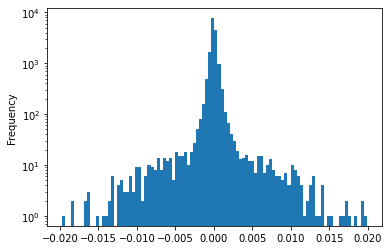

In [65]:
xx.delta.plot.hist(bins=100, log=True)

In [33]:
# Imports
import tensorflow
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.utils import to_categorical

In [34]:


# Configuration options
feature_vector_length = 784
num_classes = 10

# Load the data
(X_train, Y_train), (X_test, Y_test) = mnist.load_data()

# Reshape the data - MLPs do not understand such things as '2D'.
# Reshape to 28 x 28 pixels = 784 features
X_train = X_train.reshape(X_train.shape[0], feature_vector_length)
X_test = X_test.reshape(X_test.shape[0], feature_vector_length)

# Convert into greyscale
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255

# Convert target classes to categorical ones
Y_train = to_categorical(Y_train, num_classes)
Y_test = to_categorical(Y_test, num_classes)


11501568/11490434 [==============================] - 1s 0us/step


In [118]:
target_columns = [
    't', 'o', 'h', 'l', 'c', 'v', 'n', 'vw','o_0_delta', 'h_0_delta',
    'l_0_delta', 'c_0_delta', 'v_0_delta', 'n_0_delta', 'vw_0_delta'
]
targets = xx[target_columns]
train = xx.drop(target_columns, axis=1)

In [119]:
import numpy as np

In [120]:
from sklearn.preprocessing import LabelBinarizer

labeler = LabelBinarizer()


In [121]:

target_train = targets[:150000]
target_test = targets[150000:]

In [129]:
target_col = "c_0_delta"

In [94]:
y_train = labeler.fit_transform(np.clip(target_train[target_col]*10000, -20, 20).astype(int)+20)
y_test = labeler.fit_transform(np.clip(target_test[target_col]*10000, -20, 20).astype(int)+20)

In [130]:
y_train = target_train[target_col]>0
y_test = target_test[target_col]>0

In [102]:
y_train

1          True
2          True
3          True
4         False
5          True
          ...  
149996    False
149997     True
149998     True
149999    False
150000     True
Name: h_0_delta, Length: 150000, dtype: bool

In [97]:
y_train.shape

(150000, 1)

In [123]:
x_train = train[:150000]
x_test = train[150000:]

# y_train = np.clip(target_train["h_0_delta"]*10000, -20, 20).astype(int)+20
# y_test = np.clip(target_test["h_0_delta"]*10000, -20, 20).astype(int)+20

In [124]:
train_width = len(x_train.columns)

In [70]:
targets

,t,o,h,l,c,v,n,vw,o_0_delta,h_0_delta,l_0_delta,c_0_delta,v_0_delta,n_0_delta,vw_0_delta
1,2021-01-04T09:01:00Z,375.69,375.81,375.69,375.79,16041,44,375.791473,0.000133,0.000319,0.000133,0.000266,5.155411,1.095238,0.000300
2,2021-01-04T09:02:00Z,375.84,375.88,375.79,375.82,12514,27,375.834458,0.000399,0.000186,0.000266,0.000080,-0.219874,-0.386364,0.000114
3,2021-01-04T09:04:00Z,375.90,376.04,375.90,375.91,8995,46,376.004726,0.000160,0.000426,0.000293,0.000239,-0.281205,0.703704,0.000453
4,2021-01-04T09:05:00Z,375.90,375.90,375.88,375.88,4550,10,375.893297,0.000000,-0.000372,-0.000053,-0.000080,-0.494163,-0.782609,-0.000296
5,2021-01-04T09:06:00Z,375.88,375.91,375.88,375.91,730,2,375.889452,-0.000053,0.000027,0.000000,0.000080,-0.839560,-0.800000,-0.000010
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
205318,2022-01-01T00:53:00Z,475.23,475.23,475.20,475.23,2750,9,475.228727,0.000000,0.000000,0.000021,0.000000,1.667313,0.285714,0.000009
205319,2022-01-01T00:54:00Z,475.23,475.23,475.22,475.23,500,3,475.228000,0.000000,0.000000,0.000042,0.000000,-0.818182,-0.666667,-0.000002
205320,2022-01-01T00:55:00Z,475.23,475.23,475.23,475.23,544,4,475.230000,0.000000,0.000000,0.000021,0.000000,0.088000,0.333333,0.000004
205321,2022-01-01T00:58:00Z,475.13,475.13,475.09,475.09,8832,12,475.094774,-0.000210,-0.000210,-0.000295,-0.000295,15.235294,2.000000,-0.000285


In [131]:


# Set the input shape
input_shape = (train_width,)
print(f'Feature shape: {input_shape}')

# Create the model
model = Sequential()
model.add(Dense(350, input_shape=input_shape, activation='sigmoid'))
model.add(Dense(500, activation='sigmoid'))
model.add(Dense(500, activation='sigmoid'))
model.add(Dense(500, activation='sigmoid'))
model.add(Dense(1, activation='softmax'))

# Configure the model and start training
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model.fit(x_train, y_train, epochs=10, batch_size=10000, verbose=1, validation_split=0.2)

# Test the model after training
test_results = model.evaluate(x_test, y_test, verbose=1)
print(f'Test results - Loss: {test_results[0]} - Accuracy: {test_results[1]}%')

Feature shape: (133,)
Epoch 1/10
12/12 [==============================] - 3s 191ms/step - loss: 0.7812 - accuracy: 0.4710 - val_loss: 0.6929 - val_accuracy: 0.4602
Epoch 2/10
12/12 [==============================] - 2s 172ms/step - loss: 0.7056 - accuracy: 0.4710 - val_loss: 0.6995 - val_accuracy: 0.4602
Epoch 3/10
12/12 [==============================] - 2s 171ms/step - loss: 0.6954 - accuracy: 0.4710 - val_loss: 0.6895 - val_accuracy: 0.4602
Epoch 4/10
12/12 [==============================] - 2s 181ms/step - loss: 0.6920 - accuracy: 0.4710 - val_loss: 0.6905 - val_accuracy: 0.4602
Epoch 5/10
12/12 [==============================] - 2s 185ms/step - loss: 0.6909 - accuracy: 0.4710 - val_loss: 0.6898 - val_accuracy: 0.4602
Epoch 6/10
12/12 [==============================] - 2s 168ms/step - loss: 0.6906 - accuracy: 0.4710 - val_loss: 0.6886 - val_accuracy: 0.4602
Epoch 7/10
12/12 [==============================] - 2s 168ms/step - loss: 0.6903 - accuracy: 0.4710 - val_loss: 0.6885 - val_a

In [84]:
y_train.argmax(axis=1)

array([23, 21, 24, ..., 24, 19, 20], dtype=int64)

In [106]:

from numpy import loadtxt
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

C:\ProgramData\miniforge3\lib\site-packages\xgboost\compat.py:36: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index


In [132]:
model = XGBClassifier(max_depth=10)
model.fit(x_train, y_train)

C:\ProgramData\miniforge3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\ProgramData\miniforge3\lib\site-packages\xgboost\data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[02:01:08] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=10, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=16,
              num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [133]:
y_pred = model.predict(x_test)

In [134]:

# evaluate predictions
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 52.19%


<AxesSubplot:>

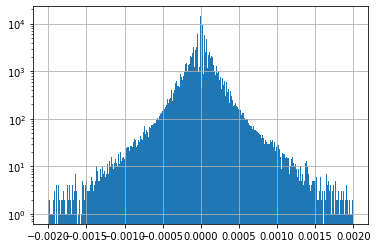

In [62]:
y_train.hist(bins=np.arange(-.002, .002, .00001), log=True, )

In [73]:
np.around(.00016*100000)

16.0